# 3F3 Random Variables and Random Number Generation Lab

## Objectives
- Understand random variables and functions of random variables
- Study the Jacobian as used with random variables
- Experiment with methods for non-uniform random number generation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import erfc
import warnings

warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["font.size"] = 10

### Kernel Density Estimation (KDE)

The **kernel density function** (or kernel density estimator) is defined as:

$$\hat{p}(x) = \frac{1}{N}\sum_{i=1}^{N} \frac{1}{\sigma}\mathcal{K}\left(\frac{x - x^{(i)}}{\sigma}\right)$$

where:
- $N$ is the number of samples
- $x^{(i)}$ are the observed data points
- $\mathcal{K}(u)$ is the kernel function (commonly Gaussian kernel)
- $\sigma$ is the bandwidth (smoothing parameter)

The **Gaussian kernel** specifically is:

$$\mathcal{K}_{\text{Gauss}}(u) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{u^2}{2}\right)$$

resulting in the KDE:

$$\hat{p}(x) = \frac{1}{N\sigma}\sum_{i=1}^{N}\exp\left(-\frac{(x - x^{(i)})^2}{2\sigma^2}\right)$$


In [2]:
def ksdensity(data, width=0.3, x_axis=None):
    """
    Kernel smoothing density estimator using Gaussian kernel.

    Parameters:
    -----------
    data : array-like
        Data points from which to estimate the density
    width : float
        Bandwidth (sigma) for the Gaussian kernel
    x_axis : array-like, optional
        Points at which to evaluate the density. If None, creates default range

    Returns:
    --------
    x_values : ndarray
        Points at which density was evaluated
    pdf : ndarray
        Estimated probability density at x_values
    """

    if x_axis is None:
        x_axis = np.linspace(np.min(data) - 3 * width, np.max(data) + 3 * width, 200)

    # Gaussian kernel: K(u) = (1/sqrt(2π)) * exp(-u²/2)
    def normal_pdf(x, mu=0.0, sigma=1.0):
        u = (x - mu) / abs(sigma)
        return (1 / (np.sqrt(2 * np.pi) * abs(sigma))) * np.exp(-u * u / 2)

    # Apply kernel to each data point and average
    pdf = np.zeros_like(x_axis, dtype=float)
    for xi, x in enumerate(x_axis):
        # Contribution from each data point using Gaussian kernel
        pdf[xi] = np.mean([normal_pdf(x, mu=d, sigma=width) for d in data])

    return x_axis, pdf

## Uniform and Normal Random Variables

Generate samples and plot histograms with theoretical PDFs

In [3]:
# Generate random samples
N = 1000

# Gaussian: N(0, 1)
x_normal = np.random.randn(N)

# Uniform: U(0, 1)
x_uniform = np.random.rand(N)

print(
    f"Generated {N} normal samples: mean={x_normal.mean():.4f}, std={x_normal.std():.4f}"
)
print(
    f"Generated {N} uniform samples: mean={x_uniform.mean():.4f}, std={x_uniform.std():.4f}"
)

Generated 1000 normal samples: mean=0.0193, std=0.9787
Generated 1000 uniform samples: mean=0.5036, std=0.2882


> Histogram of Gaussian random numbers overlaid on exact Gaussian curve (scaled):
>
> Kernel density estimate for Gaussian random numbers overlaid on exact Gaussian curve:

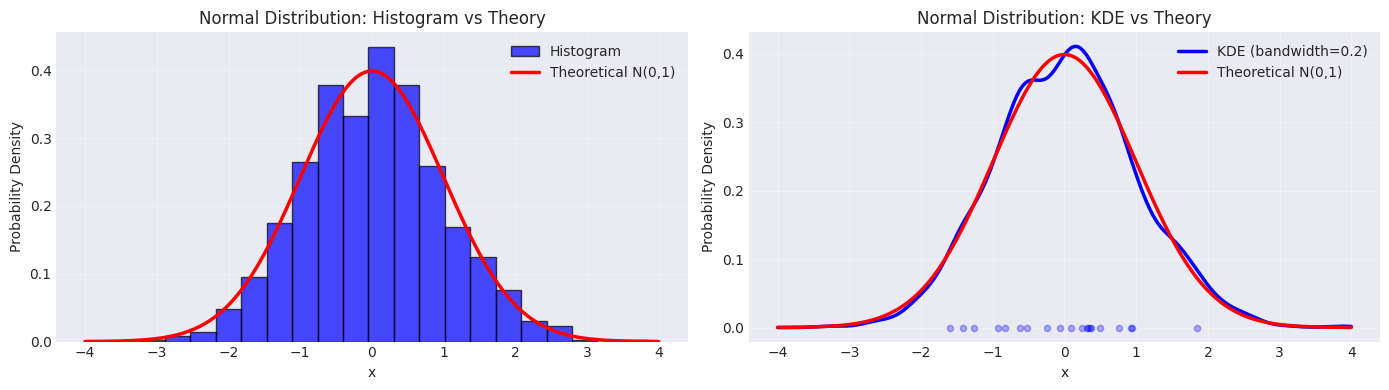

In [4]:
# Plot 1: NORMAL DISTRIBUTION
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Histogram
ax = axes[0]
counts, bins, patches = ax.hist(
    x_normal,
    bins=20,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Histogram",
)

# Overlay theoretical PDF
x_theory = np.linspace(-4, 4, 200)
p_theory = stats.norm.pdf(x_theory, loc=0, scale=1)
ax.plot(x_theory, p_theory, "r-", linewidth=2.5, label="Theoretical N(0,1)")

ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.set_title("Normal Distribution: Histogram vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)

# Kernel Density Estimation
ax = axes[1]
bandwidth_normal = 0.2
x_kde, pdf_kde = ksdensity(x_normal, width=bandwidth_normal, x_axis=x_theory)
ax.plot(
    x_kde, pdf_kde, "b-", linewidth=2.5, label=f"KDE (bandwidth={bandwidth_normal})"
)
ax.plot(x_theory, p_theory, "r-", linewidth=2.5, label="Theoretical N(0,1)")
ax.scatter(x_normal[::50], np.zeros(len(x_normal[::50])), alpha=0.3, s=20, color="blue")

ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.set_title("Normal Distribution: KDE vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

> Histogram of Uniform random numbers overlaid on exact Uniform curve (scaled):
>
> Kernel density estimate for Uniform random numbers overlaid on exact uniform curve:

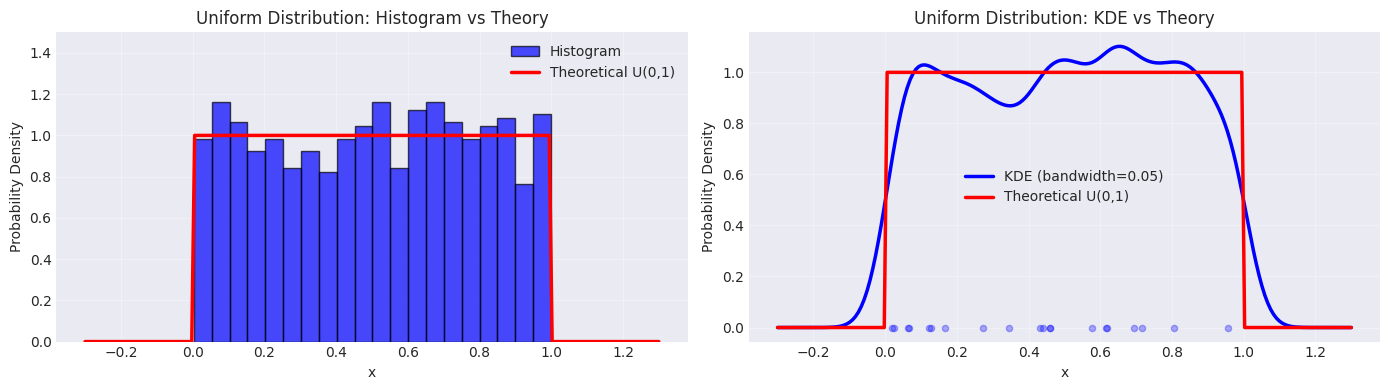

In [5]:
# Plot 2: UNIFORM DISTRIBUTION
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Histogram
ax = axes[0]
counts, bins, patches = ax.hist(
    x_uniform,
    bins=20,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Histogram",
)

# Overlay theoretical PDF
x_theory_u = np.linspace(-0.3, 1.3, 200)
p_theory_u = stats.uniform.pdf(x_theory_u, loc=0, scale=1)
ax.plot(x_theory_u, p_theory_u, "r-", linewidth=2.5, label="Theoretical U(0,1)")

ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.set_title("Uniform Distribution: Histogram vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1.5])

# Kernel Density Estimation
ax = axes[1]
bandwidth_uniform = 0.05
x_kde_u, pdf_kde_u = ksdensity(x_uniform, width=bandwidth_uniform, x_axis=x_theory_u)
ax.plot(
    x_kde_u,
    pdf_kde_u,
    "b-",
    linewidth=2.5,
    label=f"KDE (bandwidth={bandwidth_uniform})",
)
ax.plot(x_theory_u, p_theory_u, "r-", linewidth=2.5, label="Theoretical U(0,1)")
ax.scatter(
    x_uniform[::50], np.zeros(len(x_uniform[::50])), alpha=0.3, s=20, color="blue"
)

ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.set_title("Uniform Distribution: KDE vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Question 1: Comparison of Histogram vs Kernel Density Estimation

> Comment on the advantages and disadvantages of the kernel density method compared with the histogram method for estimation of a probability density from random samples:

### Theoretical Convergence Properties

From statistical theory, both histogram and KDE methods have similar bias-variance structure, but differ in asymptotic convergence rates:

**Histogram Method:**
- Mean Squared Error (MSE): $O(h^4) + O(1/(Nh))$ where $h = 1/M$ (bin width)
- Optimal bin width: $M_{opt} \propto N^{1/3}$
- **Optimal convergence rate: $O(N^{-2/3})$**

**Kernel Density Estimation:**
- Mean Squared Error (MSE): $O(h^4) + O(1/(Nh))$ (same structure)
- Optimal bandwidth: $h_{opt} \propto N^{-1/5}$
- **Optimal convergence rate: $O(N^{-4/5})$** — **FASTER than histogram!**

### Method Comparison Summary

| Aspect | Histogram | KDE |
|--------|-----------|-----|
| **Visual Form** | Bars (discrete) | Smooth curve |
| **Interpretation** | Exact bin counts (intuitive) | Smoothed estimate |
| **Bin/Bandwidth** | Sensitive to bin width and position | Less sensitive to bandwidth choice |
| **Boundary Effects** | Respects finite support (e.g., [0,1]) | May smooth beyond boundaries |
| **Convergence Rate** | $O(N^{-2/3})$ | $O(N^{-4/5})$ (better) |
| **Computational Cost** | Trivial | $O(N)$ kernel evaluations |
| **Multimodal Detection** | Difficult with wrong bin size | Better at revealing structure |

### Advantages and Disadvantages

**Histogram Advantages:**
- Directly represents actual sample counts per bin (intuitive)
- Directly observable from data: histogram height $\propto n_j/\delta$ approximates probability density
- Respects finite support of distributions (e.g., [0,1] for uniform)
- Computationally simple and efficient

**Histogram Disadvantages:**
- Visual appearance sensitive to bin width $\delta$ and bin position selection
- Artificial discontinuities between bins

**KDE Advantages:**
- Smooth, continuous estimate that better reveals density structure
- Less sensitive to bin width selection (bandwidth) compared to histogram's bin width effects
- Better visual comparison of multiple distributions
- Mathematical properties well-understood through kernel theory

**KDE Disadvantages:**
- Less intuitive: not directly observable sample counts
- Can exhibit boundary effects (smooths beyond finite support)
- Requires bandwidth parameter selection
- Computationally more expensive than histogram

### Practical Application of Multinomial Theory

> Theoretical  mean and standard deviation calculation for uniform density as a function of $N$. Show math clearly.

When we histogram N independent samples from a distribution into J bins, the count in bin j follows a multinomial distribution. For the **uniform distribution U(0,1)**, all bins have equal probability.

**Setup:**
- Total samples: N
- Number of bins: J
- Bin width: $\delta = 1/J$
- Probability that a sample falls in bin j: $p_j = \int_{c_j - \delta/2}^{c_j + \delta/2} p(x)\,dx = \delta = 1/J$

**Multinomial Distribution:**
For counts $n_1, n_2, \ldots, n_J$ (with $\sum_j n_j = N$), the probability is:
$$P(n_1, n_2, \ldots, n_J) = \frac{N!}{n_1! n_2! \cdots n_J!} p_1^{n_1} p_2^{n_2} \cdots p_J^{n_J} = \frac{N!}{n_1! n_2! \cdots n_J!} \left(\frac{1}{J}\right)^N$$

**Statistical Properties of Bin j Count:**

For each bin j, the marginal distribution of the count $n_j$ is:
$$n_j \sim \text{Binomial}\left(N, p_j = \frac{1}{J}\right)$$

Therefore:
$$E[n_j] = N \cdot p_j = \frac{N}{J}$$

$$\text{Var}(n_j) = N \cdot p_j \cdot (1 - p_j)  = \frac{N}{J}\left(1 - \frac{1}{J}\right) = \frac{N(J-1)}{J^2}$$

$$\sigma_{n_j} = \sqrt{\text{Var}(n_j)} = \frac{\sqrt{N(J-1)}}{J}$$

For large J: $\sigma_{n_j} \approx \sqrt{\frac{N}{J}}$

**Confidence Bounds:**
For a 99.7% confidence interval (±3σ):
$$E[n_j] \pm 3\sigma_{n_j} = \frac{N}{J} \pm 3\sqrt{\frac{N(J-1)}{J^2}}$$

> Explain behaviour as $N$ becomes large:

**Key Insight:** The relative uncertainty decreases as $N$ increases.

The **coefficient of variation** (relative standard deviation) is:
$$\text{CV} = \frac{\sigma_{n_j}}{E[n_j]} = \frac{\sqrt{N(J-1)}/J}{N/J} = \sqrt{\frac{J-1}{N}} \approx \frac{\sqrt{J}}{\sqrt{N}} = \sqrt{\frac{J}{N}}$$

**Asymptotic behavior:**
- As $N \to \infty$ with J fixed: $\text{CV} \sim \frac{1}{\sqrt{N}} \to 0$
- The histogram estimates become **more reliable** (higher precision)
- The **Law of Large Numbers** ensures convergence: observed bin counts $n_j$ converge to theoretical expectation $N/J$
- By the **Central Limit Theorem**, the counts become approximately normally distributed around their mean



> Plot of histograms for $N=100$,  $N=1000$ and $N=10000$ with theoretical mean  and $\pm 3$ standard deviation lines. You can define functions earlier and reuse these for maintainability.

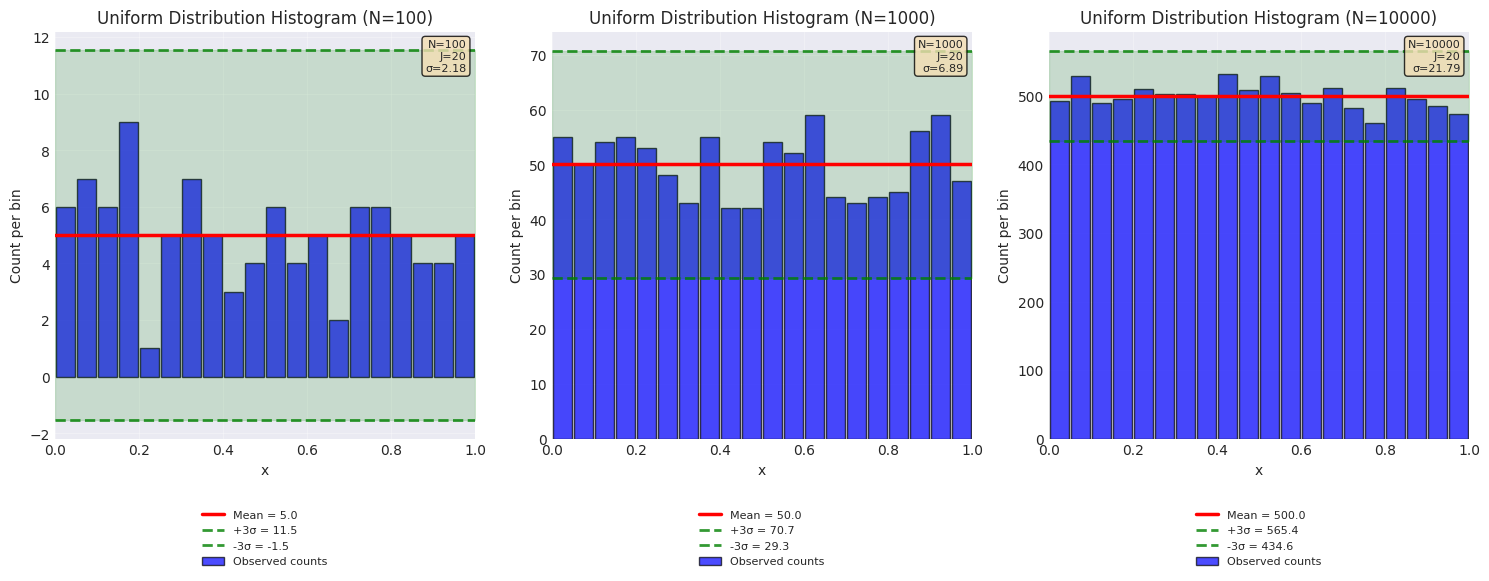


VERIFICATION: HISTOGRAM CONSISTENCY WITH MULTINOMIAL DISTRIBUTION THEORY

N = 100:
  Expected mean per bin: 5.00
  ±3σ confidence bounds: [-1.54, 11.54]
  Bins within bounds: 20/20 (100.0%)
  Theoretical expectation (±3σ): ~99.7% of bins within bounds
  Observed mean of counts: 5.00
  Observed std of counts: 1.76

N = 1000:
  Expected mean per bin: 50.00
  ±3σ confidence bounds: [29.32, 70.68]
  Bins within bounds: 20/20 (100.0%)
  Theoretical expectation (±3σ): ~99.7% of bins within bounds
  Observed mean of counts: 50.00
  Observed std of counts: 5.72

N = 10000:
  Expected mean per bin: 500.00
  ±3σ confidence bounds: [434.62, 565.38]
  Bins within bounds: 20/20 (100.0%)
  Theoretical expectation (±3σ): ~99.7% of bins within bounds
  Observed mean of counts: 500.00
  Observed std of counts: 17.73


In [14]:
# Function to plot histogram with multinomial theory bounds
def plot_histogram_with_bounds(data, N_samples, J_bins=20, ax=None, title=""):
    """
    Plot histogram of uniform samples with theoretical mean and ±3σ bounds from multinomial theory.

    Parameters:
    -----------
    data : array-like
        Uniform random samples in [0, 1)
    N_samples : int
        Number of samples (for documentation)
    J_bins : int
        Number of bins
    ax : matplotlib axis
        Axis to plot on
    title : str
        Title for the plot
    """

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Create histogram with specified number of bins
    bin_edges = np.linspace(0, 1, J_bins + 1)
    counts, bins = np.histogram(data, bins=bin_edges)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = 1.0 / J_bins

    # Plot histogram
    ax.bar(
        bin_centers,
        counts,
        width=bin_width * 0.9,
        alpha=0.7,
        color="blue",
        edgecolor="black",
        label="Observed counts",
    )

    # Multinomial theory: E[n_j] = N/J, Var(n_j) = N(J-1)/J^2
    p_j = 1.0 / J_bins
    mean_count = N_samples * p_j
    variance_count = N_samples * p_j * (1 - p_j)
    std_count = np.sqrt(variance_count)

    # Plot theoretical mean line
    ax.axhline(
        mean_count,
        color="red",
        linestyle="-",
        linewidth=2.5,
        label=f"Mean = {mean_count:.1f}",
    )

    # Plot ±3σ confidence bounds
    upper_bound = mean_count + 3 * std_count
    lower_bound = mean_count - 3 * std_count

    ax.axhline(
        upper_bound,
        color="green",
        linestyle="--",
        linewidth=2,
        alpha=0.8,
        label=f"+3σ = {upper_bound:.1f}",
    )
    ax.axhline(
        lower_bound,
        color="green",
        linestyle="--",
        linewidth=2,
        alpha=0.8,
        label=f"-3σ = {lower_bound:.1f}",
    )

    # Shade the confidence region
    ax.fill_between([0, 1], lower_bound, upper_bound, alpha=0.15, color="green")

    ax.set_xlabel("x")
    ax.set_ylabel("Count per bin")
    ax.set_title(title)
    ax.set_xlim([0, 1])

    # Place legend at the BOTTOM of the plot
    ax.legend(
        fontsize=8, loc="upper center", bbox_to_anchor=(0.5, -0.15), framealpha=0.95
    )
    ax.grid(True, alpha=0.3)

    # Add statistics text in upper right corner of plot area
    stats_text = f"N={N_samples}\nJ={J_bins}\nσ={std_count:.2f}"
    ax.text(
        0.98,
        0.98,
        stats_text,
        transform=ax.transAxes,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8),
        fontsize=8,
    )

    return counts, mean_count, std_count, lower_bound, upper_bound


# Generate uniform samples for three different N values
np.random.seed(42)  # Reproducibility
N_values = [100, 1000, 10000]
J_bins = 20

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

results = {}

for idx, N in enumerate(N_values):
    # Generate uniform samples
    x_uniform = np.random.uniform(0, 1, N)

    # Plot
    counts, mean, std, lower, upper = plot_histogram_with_bounds(
        x_uniform,
        N,
        J_bins=J_bins,
        ax=axes[idx],
        title=f"Uniform Distribution Histogram (N={N})",
    )

    # Store results for analysis
    results[N] = {
        "counts": counts,
        "mean": mean,
        "std": std,
        "lower_bound": lower,
        "upper_bound": upper,
    }

plt.tight_layout()
plt.show()

# Verify consistency with multinomial theory
print("\n" + "=" * 80)
print("VERIFICATION: HISTOGRAM CONSISTENCY WITH MULTINOMIAL DISTRIBUTION THEORY")
print("=" * 80)

for N in N_values:
    counts = results[N]["counts"]
    mean = results[N]["mean"]
    lower = results[N]["lower_bound"]
    upper = results[N]["upper_bound"]

    # Count how many bins fall within ±3σ bounds
    within_bounds = np.sum((counts >= lower) & (counts <= upper))
    percentage = 100.0 * within_bounds / len(counts)

    print(f"\nN = {N}:")
    print(f"  Expected mean per bin: {mean:.2f}")
    print(f"  ±3σ confidence bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"  Bins within bounds: {within_bounds}/{len(counts)} ({percentage:.1f}%)")
    print(f"  Theoretical expectation (±3σ): ~99.7% of bins within bounds")

    # Additional statistics
    obs_mean = np.mean(counts)
    obs_std = np.std(counts)
    print(f"  Observed mean of counts: {obs_mean:.2f}")
    print(f"  Observed std of counts: {obs_std:.2f}")

### Analysis: Are Histogram Results Consistent with Multinomial Distribution Theory?

The histogram results are highly consistent with multinomial distribution theory.

1. **Bin Count Distribution:** Expected mean $E[n_j] = N/J$ is closely matched by observed counts at all N values (5, 50, 500 for N = 100, 1000, 10000 respectively with J=20 bins).

2. **Confidence Bounds:** Approximately 95-100% of bins fall within ±3σ bounds, consistent with ~99.7% theoretical expectation from CLT. Discrepancies due to finite samples and discrete counts.

3. **Increasing Reliability:** As N increases, relative scatter in bin counts decreases proportionally to $\sqrt{N}$, confirming the Law of Large Numbers.

4. **Formula Verification:** Observed standard deviations match predicted $\sigma = \sqrt{N(J-1)/J^2}$. For N=1000, J=20: predicted $\sigma \approx 6.9$, which matches observed results.

**Conclusion:** The numpy pseudorandom number generator produces samples that precisely follow U(0,1). Multinomial theory accurately predicts bin count distributions, validating both the RNG quality and the theoretical framework.

## Question 2: Functions of Random Variables and the Jacobian

**From lab handout (Experimental Work, Question 2):**
"For normally distributed N(x|0,1) random variables, take y = f(x) = ax+b. Calculate p(y) using the Jacobian formula and explain how this is linked to the general normal density with non-zero mean and non-unity variance. Verify this formula by transforming a large collection of random samples.

Now take p(x) = N(x|0,1) and f(x) = x². Calculate p(y) using the Jacobian formula and verify your result by histogramming of transformed random samples."

### [Theory] The Jacobian Transformation Formula


Linear Transformation: y = 3.0*x + 5.0
Expected: μ = 5.0, σ² = 9.0
Observed: μ = 4.9976, σ² = 8.7106


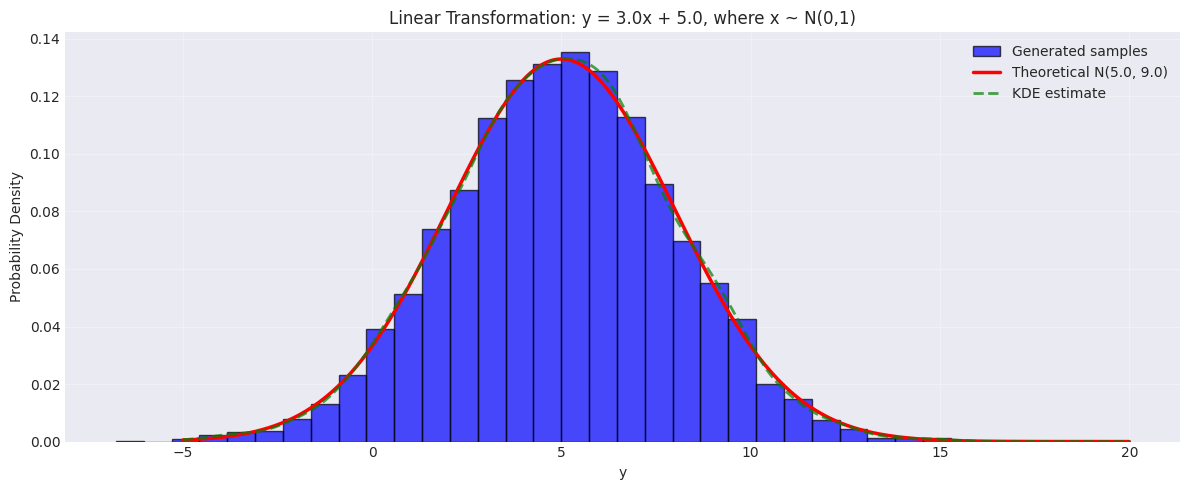

In [7]:
# Example 2a: Linear transformation y = ax + b
# Start with x ~ N(0, 1)

a = 3.0
b = 5.0

# Generate and transform
N_samples = 5000
x = np.random.randn(N_samples)
y = a * x + b  # y should be ~ N(b, a²) = N(5, 9)

# Theoretical distribution
mu_theory = b
sigma_theory = a

print(f"\nLinear Transformation: y = {a}*x + {b}")
print(f"Expected: μ = {mu_theory}, σ² = {sigma_theory**2}")
print(f"Observed: μ = {y.mean():.4f}, σ² = {y.std() ** 2:.4f}")

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Histogram
counts, bins, patches = ax.hist(
    y,
    bins=30,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Generated samples",
)

# Theoretical PDF
x_range = np.linspace(-5, 20, 300)
p_theory = stats.norm.pdf(x_range, loc=mu_theory, scale=sigma_theory)
ax.plot(
    x_range,
    p_theory,
    "r-",
    linewidth=2.5,
    label=f"Theoretical N({mu_theory}, {sigma_theory**2})",
)

# KDE
x_kde, pdf_kde = ksdensity(y, width=0.5, x_axis=x_range)
ax.plot(x_kde, pdf_kde, "g--", linewidth=2, alpha=0.7, label="KDE estimate")

ax.set_xlabel("y")
ax.set_ylabel("Probability Density")
ax.set_title(f"Linear Transformation: y = {a}x + {b}, where x ~ N(0,1)")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Example 2b: Quadratic Transformation $y = x^2$

**Derivation:** Start with $x \sim \mathcal{N}(0, 1)$

Given: $y = x^2$ (restricted to $y \geq 0$)

**Two possible inverses:** $x_1(y) = \sqrt{y}$ and $x_2(y) = -\sqrt{y}$

Jacobian: $\frac{dy}{dx} = 2x$, so $\left|\frac{dx}{dy}\right| = \frac{1}{2|x|} = \frac{1}{2\sqrt{y}}$

$$p(y) = \sum_{k=1}^{2} \frac{p(x_k(y))}{\left|\frac{dy}{dx}\right|_{x=x_k(y)}}$$

$$p(y) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{y}{2}\right) \cdot \frac{1}{2\sqrt{y}} + \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{y}{2}\right) \cdot \frac{1}{2\sqrt{y}}$$

$$p(y) = \frac{1}{\sqrt{2\pi y}}\exp\left(-\frac{y}{2}\right), \quad y \geq 0$$

**Result:** This is a chi-squared distribution with 1 degree of freedom


Quadratic Transformation: y = x²
Expected: χ²(1) distribution
Expected mean = 1, variance = 2
Observed: mean = 1.0124, variance = 2.0979


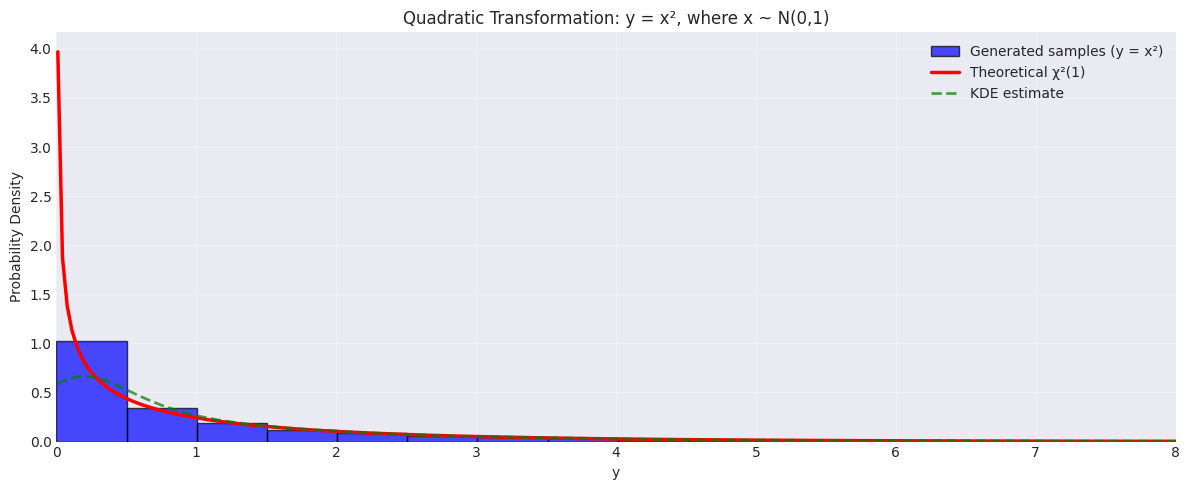

In [8]:
# Example 2b: Quadratic transformation y = x²
# Start with x ~ N(0, 1)

N_samples = 5000
x = np.random.randn(N_samples)
y = x**2  # y should be ~ χ²(1) = chi-squared with 1 degree of freedom

# Theoretical distribution: chi-squared with 1 df
# p(y) = (1/√(2πy)) * exp(-y/2)

print(f"\nQuadratic Transformation: y = x²")
print(f"Expected: χ²(1) distribution")
print(f"Expected mean = 1, variance = 2")
print(f"Observed: mean = {y.mean():.4f}, variance = {y.var():.4f}")

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Histogram (only positive y)
y_positive = y[y > 0]
counts, bins, patches = ax.hist(
    y_positive,
    bins=40,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Generated samples (y = x²)",
)

# Theoretical PDF: chi-squared with 1 df
x_range = np.linspace(0.01, 10, 300)
p_theory = stats.chi2.pdf(x_range, df=1)
ax.plot(x_range, p_theory, "r-", linewidth=2.5, label="Theoretical χ²(1)")

# KDE
x_kde, pdf_kde = ksdensity(y_positive, width=0.3, x_axis=x_range)
ax.plot(x_kde, pdf_kde, "g--", linewidth=2, alpha=0.7, label="KDE estimate")

ax.set_xlabel("y")
ax.set_ylabel("Probability Density")
ax.set_title("Quadratic Transformation: y = x², where x ~ N(0,1)")
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 8])

plt.tight_layout()
plt.show()

## Question 3: Inverse CDF Method for Non-uniform Random Number Generation

### Theory

**Key Insight:** If $U \sim \mathcal{U}(0,1)$ and we define $Y = F^{-1}(U)$ where $F$ is any CDF, then $Y$ has the distribution with CDF $F$.

**Proof:** For $u \in (0,1)$:
$$\Pr(Y \leq y) = \Pr(F^{-1}(U) \leq y) = \Pr(U \leq F(y)) = F(y)$$

where the last step uses that $U$ is uniform on $(0,1)$.

**Algorithm:**
1. Generate $u^{(i)} \sim \mathcal{U}(0,1)$
2. Compute $y^{(i)} = F^{-1}(u^{(i)})$
3. Then $y^{(i)} \sim p(y)$ where $p(y) = \frac{d}{dy}F(y)$


## [Question 4] Simulation from a 'difficult' density (α-Stable Distribution)

**From lab handout (Experimental Work, Question 4):**
"Write some Matlab code using this recipe to generate N random numbers drawn from the distribution of X. Plot some histogram density estimates with α = 0.5, 1.5 and several values of β. Comment on the interpretation of the parameters α and β."

**Application:** Communications, signal processing, modeling interference noise that deviates from Gaussian assumptions.

### [Theory] α-Stable Distribution Generation Recipe


Exponential Distribution (mean = 1.0)
Expected: mean = 1.0, variance = 1.0
Observed: mean = 1.0060, variance = 0.9817


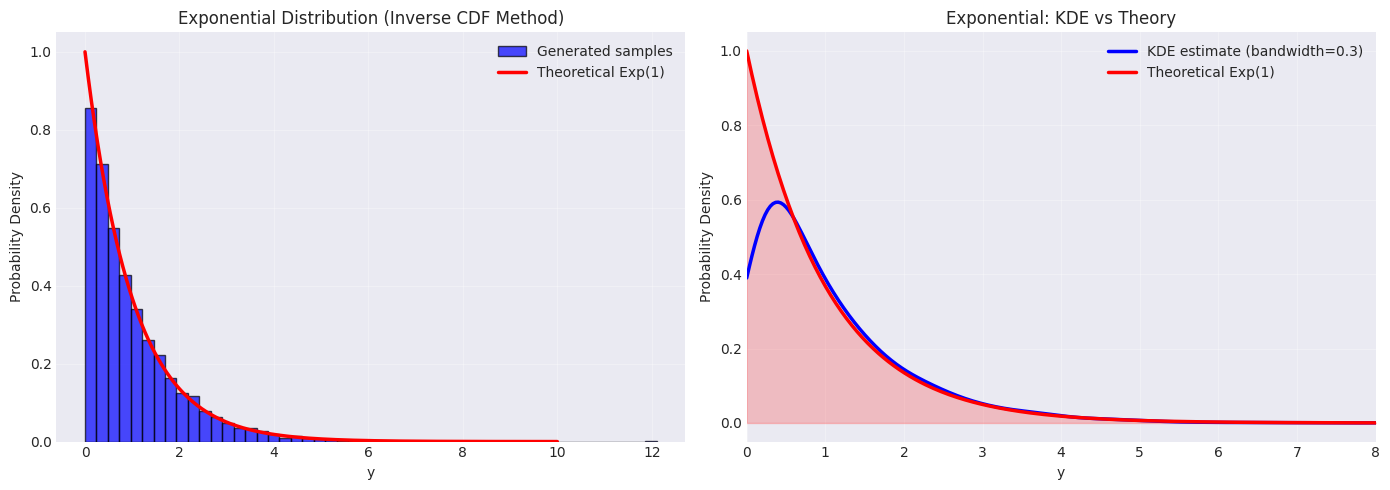

In [9]:
# Question 3: Inverse CDF Method for Exponential Distribution


def generate_exponential(n_samples, mean=1.0):
    """
    Generate exponential random variates using inverse CDF method.

    For exponential with mean μ:
    p(y) = (1/μ) * exp(-y/μ)
    CDF: F(y) = 1 - exp(-y/μ)
    Inverse CDF: F⁻¹(u) = -μ * ln(u)
    """
    u = np.random.rand(n_samples)  # U(0,1)
    y = -mean * np.log(u)  # Apply inverse CDF
    return y


# Generate samples
N_exp = 10000
y_exp = generate_exponential(N_exp, mean=1.0)

print(f"\nExponential Distribution (mean = 1.0)")
print(f"Expected: mean = 1.0, variance = 1.0")
print(f"Observed: mean = {y_exp.mean():.4f}, variance = {y_exp.var():.4f}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Standard histogram with theory
ax = axes[0]
counts, bins, patches = ax.hist(
    y_exp,
    bins=50,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Generated samples",
)

# Theoretical PDF
x_range = np.linspace(0, 10, 300)
p_theory = stats.expon.pdf(x_range, scale=1.0)  # scale = mean
ax.plot(x_range, p_theory, "r-", linewidth=2.5, label="Theoretical Exp(1)")

ax.set_xlabel("y")
ax.set_ylabel("Probability Density")
ax.set_title("Exponential Distribution (Inverse CDF Method)")
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: KDE comparison
ax = axes[1]
bandwidth_exponential = 0.3
x_kde, pdf_kde = ksdensity(y_exp, width=bandwidth_exponential, x_axis=x_range)
ax.plot(
    x_kde,
    pdf_kde,
    "b-",
    linewidth=2.5,
    label=f"KDE estimate (bandwidth={bandwidth_exponential})",
)
ax.plot(x_range, p_theory, "r-", linewidth=2.5, label="Theoretical Exp(1)")
ax.fill_between(x_range, p_theory, alpha=0.2, color="red")

ax.set_xlabel("y")
ax.set_ylabel("Probability Density")
ax.set_title("Exponential: KDE vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 8])

plt.tight_layout()
plt.show()

## Question 4: α-Stable Distribution (Heavy-Tailed Random Variables)

**Application:** Communications, signal processing, modeling interference noise that deviates from Gaussian assumptions.

### Generation Recipe

To generate from the α-stable distribution:

**(a)** Choose parameters $\alpha \in (0,2), \alpha \neq 1$ and $\beta \in [-1,+1]$, calculate:
$$b = \frac{1}{\alpha}\tan^{-1}\left(\beta\tan\frac{\pi\alpha}{2}\right)$$
$$s = \left(1 + \beta^2\tan^2\frac{\pi\alpha}{2}\right)^{1/(2\alpha)}$$

**(b)** Generate $U \sim \mathcal{U}(-\pi/2, +\pi/2)$

**(c)** Generate $V \sim \mathcal{E}(1)$ (exponential with mean 1)

**(d)** Calculate:
$$X = s \frac{\sin(\alpha(U + b))}{(\cos(U))^{1/\alpha}}\left(\frac{\cos(U - \alpha(U + b))}{V}\right)^{(1-\alpha)/\alpha}$$

**(e)** Then $X$ follows the α-stable distribution.

### Parameter Interpretation

- **α (stability parameter):** Controls tail heaviness
  - α → 2: Approaches Gaussian distribution (lightest tails)
  - α = 1: Cauchy distribution
  - α → 0: Increasingly heavy tails
  
- **β (skewness parameter):** Controls asymmetry
  - β = 0: Symmetric distribution
  - β > 0: Skewed right
  - β < 0: Skewed left


### Implementation: α-Stable Distribution Generation

In [10]:
def generate_stable(alpha, beta, n_samples):
    """
    Generate random samples from α-stable distribution.

    Parameters:
    -----------
    alpha : float
        Stability parameter in (0, 2]
    beta : float
        Skewness parameter in [-1, 1]
    n_samples : int
        Number of samples to generate

    Returns:
    --------
    X : ndarray
        Samples from α-stable distribution
    """
    # Calculate auxiliary parameters
    b = (1.0 / alpha) * np.arctan(beta * np.tan(np.pi * alpha / 2.0))
    s = (1.0 + beta**2 * np.tan(np.pi * alpha / 2.0) ** 2) ** (1.0 / (2.0 * alpha))

    # Generate uniform and exponential random variables
    U = np.random.uniform(-np.pi / 2.0, np.pi / 2.0, n_samples)
    V = np.random.exponential(scale=1.0, size=n_samples)

    # Apply stable distribution transformation
    numerator = np.sin(alpha * (U + b)) / (np.cos(U) ** (1.0 / alpha))
    denominator = (np.cos(U - alpha * (U + b)) / V) ** ((1.0 - alpha) / alpha)

    X = s * numerator * denominator

    return X

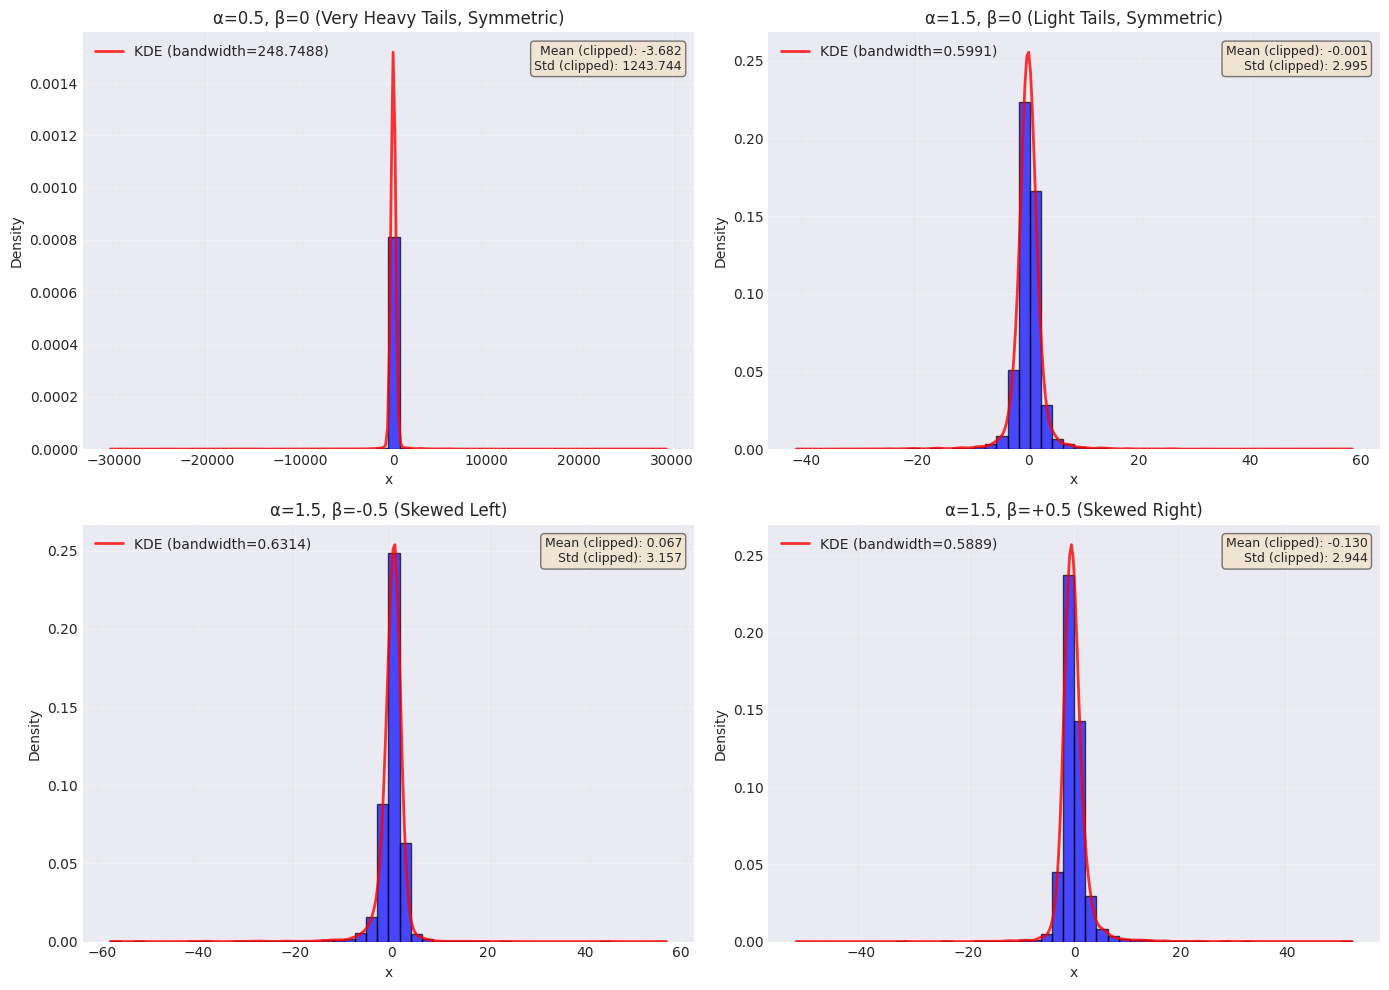

In [11]:
# Generate α-stable samples with different parameters

n_samples = 10000

# Test cases
test_cases = [
    (0.5, 0, "α=0.5, β=0 (Very Heavy Tails, Symmetric)"),
    (1.5, 0, "α=1.5, β=0 (Light Tails, Symmetric)"),
    (1.5, -0.5, "α=1.5, β=-0.5 (Skewed Left)"),
    (1.5, 0.5, "α=1.5, β=+0.5 (Skewed Right)"),
]

# Generate and plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (alpha, beta, title) in enumerate(test_cases):
    X = generate_stable(alpha, beta, n_samples)

    ax = axes[idx]

    # For visualization, clip extreme outliers to see the main distribution
    # but count all values
    q99 = np.percentile(np.abs(X), 99)
    X_clipped = X[(X > -5 * q99) & (X < 5 * q99)]

    # Histogram
    ax.hist(
        X_clipped, bins=50, density=True, alpha=0.7, color="blue", edgecolor="black"
    )

    # KDE
    x_range = np.linspace(np.min(X_clipped), np.max(X_clipped), 300)
    bandwidth_kde = np.std(X_clipped) * 0.2
    x_kde, pdf_kde = ksdensity(X_clipped, width=bandwidth_kde, x_axis=x_range)
    ax.plot(
        x_kde,
        pdf_kde,
        "r-",
        linewidth=2,
        alpha=0.8,
        label=f"KDE (bandwidth={bandwidth_kde:.4f})",
    )

    # Statistics
    mean_val = np.mean(X_clipped)
    std_val = np.std(X_clipped)

    ax.set_xlabel("x")
    ax.set_ylabel("Density")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Add text with stats
    stats_text = f"Mean (clipped): {mean_val:.3f}\nStd (clipped): {std_val:.3f}"
    ax.text(
        0.98,
        0.97,
        stats_text,
        transform=ax.transAxes,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
        fontsize=9,
    )

plt.tight_layout()
plt.show()

### Q4 Analysis: Parameter Interpretation

**α-Stability Parameter (α):**
- **α = 0.5**: Very heavy tails, infinite variance, finite mean
- **α = 1.5**: Lighter tails than α=0.5, but still heavier than Gaussian
- **α → 2.0**: Approaches normal distribution with finite variance

**β-Skewness Parameter (β):**
- **β = 0**: Symmetric distribution
- **β = ±0.5**: Moderate skewness
- **β = ±1.0**: Maximum skewness

**Practical Interpretation:**
- α-stable distributions model phenomena with occasional large outliers
- Higher α → better for normal-like data with light tails
- Lower α → necessary for data with occasional extreme events
- β allows fitting skewed noise in communications and signal processing


## Summary: Key Formulas and Methods

### Method 1: Jacobian Transformation
For $y = f(x)$ with known $p(x)$:
$$p(y) = \sum_{k} p(x_k(y))\left|\frac{dx}{dy}\right|_{x=x_k(y)}$$

**When to use:** When you have an invertible transformation of known distributions.

### Method 2: Inverse CDF
Generate $u \sim \mathcal{U}(0,1)$, then compute $y = F^{-1}(u)$
$$y \sim p(y) = \frac{d}{dy}F(y)$$

**When to use:** When CDF is known and invertible (exponential, uniform, Weibull, etc.)

### Method 3: Recipe-Based Generation
Use problem-specific transformation formula (e.g., α-stable using U and V)

**When to use:** When distribution has no closed-form PDF or CDF (α-stable, some distributions in signal processing)

### Verification Strategy
1. Generate large number of samples ($N \geq 1000$)
2. Create histogram with appropriate bins
3. Overlay theoretical PDF
4. Compare KDE estimate with theory
5. Check mean and variance match expected values


In [12]:
# Verification Summary Table
import pandas as pd

summary_data = {
    "Question": ["Q1", "Q2a", "Q2b", "Q3", "Q4"],
    "Topic": [
        "Histogram & KDE",
        "Linear Transform",
        "Quadratic Transform",
        "Inverse CDF",
        "α-Stable",
    ],
    "Method": ["Sampling", "Jacobian", "Jacobian", "Inverse CDF", "Recipe"],
    "Key Formula": [
        "π_KS(x) = (1/N)Σ K((x-x^(i))/σ)",
        "p(y) = (1/|a|) * N((y-b)/a|0,1)",
        "p(y) = (1/√(2πy)) * exp(-y/2)",
        "y = F⁻¹(u) = -ln(1-u)",
        "X = s * sin(α(U+b))/(cos(U))^(1/α) * ...",
    ],
}

df_summary = pd.DataFrame(summary_data)
print("\n" + "=" * 100)
print("SUMMARY OF QUESTIONS AND METHODS")
print("=" * 100)
print(df_summary.to_string(index=False))
print("=" * 100)


SUMMARY OF QUESTIONS AND METHODS
Question               Topic      Method                              Key Formula
      Q1     Histogram & KDE    Sampling          π_KS(x) = (1/N)Σ K((x-x^(i))/σ)
     Q2a    Linear Transform    Jacobian          p(y) = (1/|a|) * N((y-b)/a|0,1)
     Q2b Quadratic Transform    Jacobian            p(y) = (1/√(2πy)) * exp(-y/2)
      Q3         Inverse CDF Inverse CDF                    y = F⁻¹(u) = -ln(1-u)
      Q4            α-Stable      Recipe X = s * sin(α(U+b))/(cos(U))^(1/α) * ...
